⚡ 빠른 결정자 vs 느린 탐색자 구매 전환율 분석

1️⃣ 원본 데이터셋 정보
   전체 데이터 수: 12,330건
   전체 구매 건수: 1,908건
   전체 구매율: 15.47%

2️⃣ 데이터 전처리
   분석 컬럼: ProductRelated_Duration, Administrative_Duration, PageValues, Revenue
--------------------------------------------------------------------------------

   📋 결측치 확인:
      ProductRelated_Duration: 0건 (0.00%)
      Administrative_Duration: 0건 (0.00%)
      PageValues: 0건 (0.00%)
      Revenue: 0건 (0.00%)

   ✂️  결측치 제거: 0건 제거
   남은 데이터: 12,330건

   📊 이상치 탐지:
      ProductRelated_Duration 음수: 0건
      Administrative_Duration 음수: 0건

   ✂️  이상치 제거: 0건 제거 (음수 값)
   최종 데이터: 12,330건 (100.0%)

3️⃣ 전처리 후 데이터 요약
   총 제거: 0건
   최종 분석 데이터: 12,330건
   최종 구매 건수: 1,908건
   최종 구매율: 15.47%

4️⃣ 체류 시간 분포 확인
--------------------------------------------------------------------------------
   총 체류 시간 (분):
      최소: 0.00분
      최대: 1122.87분
      평균: 21.26분
      중앙값: 11.02분

5️⃣ 고객 그룹 분류
--------------------------------------------------------------------------------
   그룹별 고객 수:
 

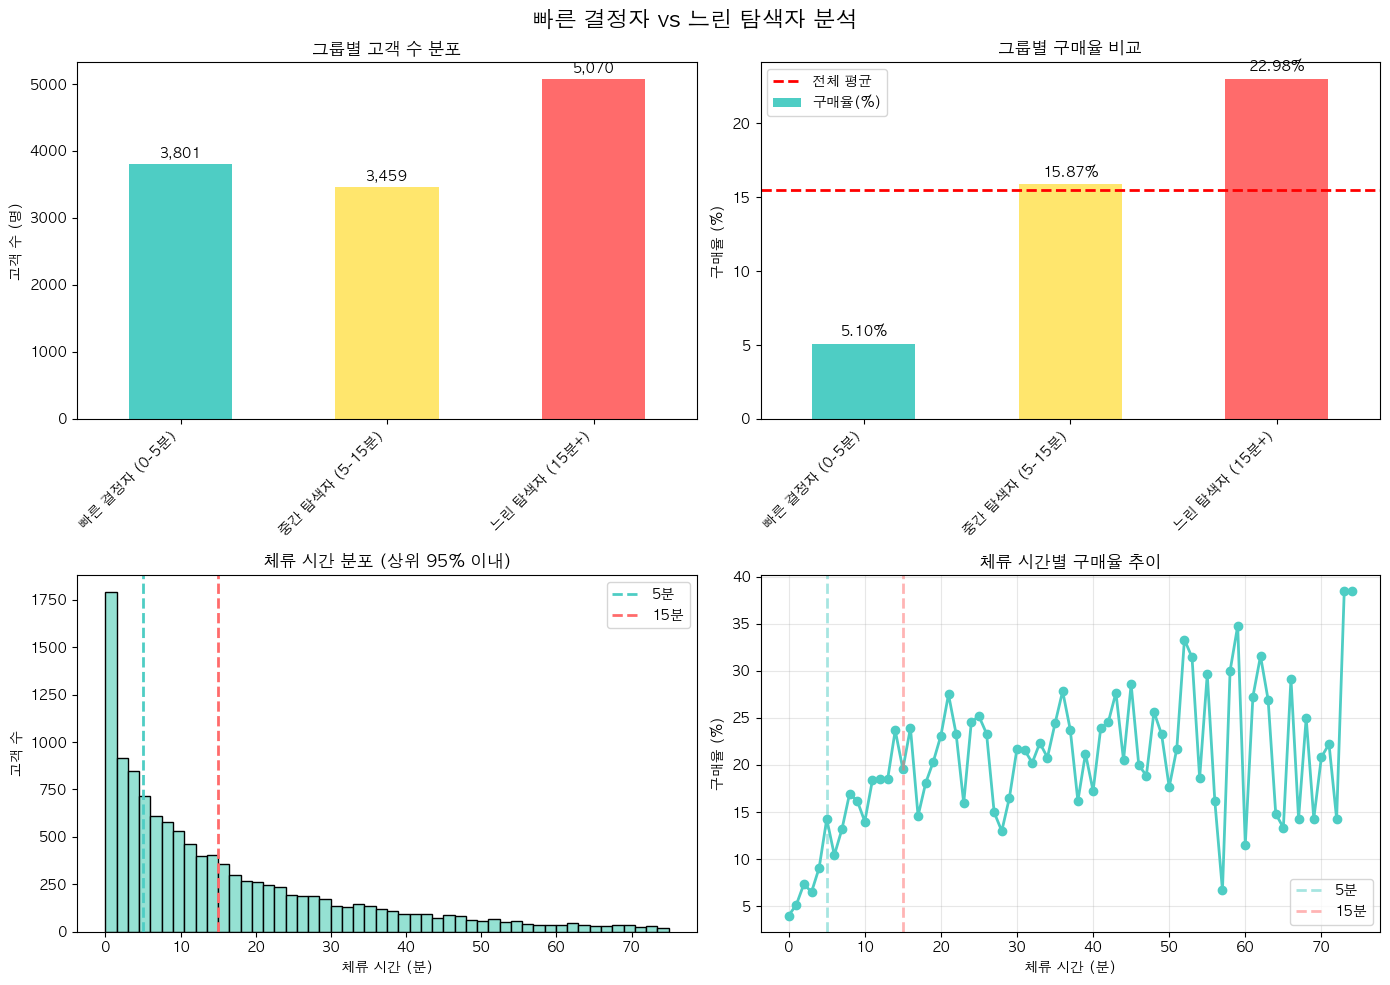

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic' # Mac 
# plt.rcParams['font.family'] = 'NanumGothic' # Linux
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지


# 데이터 로드
df = pd.read_csv('/Users/h/Desktop/ms/vscode/my/dataton_project/data/online_shoppers/online_shoppers_intention.csv')

print("=" * 80)
print("⚡ 빠른 결정자 vs 느린 탐색자 구매 전환율 분석")
print("=" * 80)
print()

# 1. 원본 데이터 기본 정보
print("1️⃣ 원본 데이터셋 정보")
print(f"   전체 데이터 수: {len(df):,}건")
print(f"   전체 구매 건수: {df['Revenue'].sum():,}건")
print(f"   전체 구매율: {df['Revenue'].mean()*100:.2f}%")
print()

# 2. 데이터 전처리
analysis_columns = ['ProductRelated_Duration', 'Administrative_Duration', 'PageValues', 'Revenue']
print("2️⃣ 데이터 전처리")
print(f"   분석 컬럼: {', '.join(analysis_columns)}")
print("-" * 80)

# 2-1. 결측치 확인 및 제거
print("\n   📋 결측치 확인:")
missing_counts = df[analysis_columns].isnull().sum()
for col in analysis_columns:
    missing = missing_counts[col]
    missing_pct = (missing / len(df)) * 100
    print(f"      {col}: {missing}건 ({missing_pct:.2f}%)")

df_clean = df[analysis_columns].dropna()
removed_missing = len(df) - len(df_clean)
print(f"\n   ✂️  결측치 제거: {removed_missing}건 제거")
print(f"   남은 데이터: {len(df_clean):,}건")

# 2-2. 음수 값 제거 (체류 시간은 0 이상이어야 함)
print("\n   📊 이상치 탐지:")
negative_product = (df_clean['ProductRelated_Duration'] < 0).sum()
negative_admin = (df_clean['Administrative_Duration'] < 0).sum()
print(f"      ProductRelated_Duration 음수: {negative_product}건")
print(f"      Administrative_Duration 음수: {negative_admin}건")

# 음수 값 제거
df_clean = df_clean[(df_clean['ProductRelated_Duration'] >= 0) & 
                     (df_clean['Administrative_Duration'] >= 0)]

removed_outliers = negative_product + negative_admin
print(f"\n   ✂️  이상치 제거: {removed_outliers}건 제거 (음수 값)")
print(f"   최종 데이터: {len(df_clean):,}건 ({len(df_clean)/len(df)*100:.1f}%)")

# 2-3. 총 체류 시간 계산 (단위: 초 → 분 변환)
# ProductRelated_Duration + Administrative_Duration = 전체 사이트 체류 시간
df_clean['total_duration_minutes'] = (df_clean['ProductRelated_Duration'] + 
                                      df_clean['Administrative_Duration']) / 60

print()
print("3️⃣ 전처리 후 데이터 요약")
print(f"   총 제거: {removed_missing + removed_outliers}건")
print(f"   최종 분석 데이터: {len(df_clean):,}건")
print(f"   최종 구매 건수: {df_clean['Revenue'].sum():,}건")
print(f"   최종 구매율: {df_clean['Revenue'].mean()*100:.2f}%")
print()

# 3. 체류 시간 분포 확인
print("4️⃣ 체류 시간 분포 확인")
print("-" * 80)
print(f"   총 체류 시간 (분):")
print(f"      최소: {df_clean['total_duration_minutes'].min():.2f}분")
print(f"      최대: {df_clean['total_duration_minutes'].max():.2f}분")
print(f"      평균: {df_clean['total_duration_minutes'].mean():.2f}분")
print(f"      중앙값: {df_clean['total_duration_minutes'].median():.2f}분")
print()

# 4. 고객 그룹 분류
# 빠른 결정자: 0~5분 이내
# 중간 탐색자: 5~15분
# 느린 탐색자: 15분 이상
print("5️⃣ 고객 그룹 분류")
print("-" * 80)

df_clean['customer_type'] = pd.cut(
    df_clean['total_duration_minutes'],
    bins=[0, 5, 15, float('inf')],
    labels=['빠른 결정자 (0-5분)', '중간 탐색자 (5-15분)', '느린 탐색자 (15분+)'],
    include_lowest=True
)

# 각 그룹별 데이터 개수
group_counts = df_clean['customer_type'].value_counts().sort_index()
print("   그룹별 고객 수:")
for group, count in group_counts.items():
    pct = (count / len(df_clean)) * 100
    print(f"      {group}: {count:,}명 ({pct:.1f}%)")
print()

# 5. 그룹별 구매율 비교
print("6️⃣ 그룹별 구매율 비교")
print("-" * 80)

# 각 그룹별 구매율 계산
purchase_by_group = df_clean.groupby('customer_type', observed=True)['Revenue'].agg([
    ('고객수', 'count'),
    ('구매건수', 'sum'),
    ('구매율(%)', lambda x: x.mean() * 100)
]).round(2)

print(purchase_by_group)
print()

# 빠른 결정자 vs 느린 탐색자 직접 비교
quick_deciders = df_clean[df_clean['customer_type'] == '빠른 결정자 (0-5분)']
slow_explorers = df_clean[df_clean['customer_type'] == '느린 탐색자 (15분+)']

quick_rate = quick_deciders['Revenue'].mean() * 100
slow_rate = slow_explorers['Revenue'].mean() * 100

print("   🔥 핵심 비교: 빠른 결정자 vs 느린 탐색자")
print(f"      빠른 결정자 구매율: {quick_rate:.2f}%")
print(f"      느린 탐색자 구매율: {slow_rate:.2f}%")
print(f"      구매율 차이: {quick_rate - slow_rate:+.2f}%p")

if quick_rate > slow_rate:
    improvement = ((quick_rate / slow_rate) - 1) * 100
    print(f"      빠른 결정자가 {improvement:+.1f}% 더 높음! ✅")
else:
    decline = ((slow_rate / quick_rate) - 1) * 100
    print(f"      느린 탐색자가 {decline:+.1f}% 더 높음 ❌")
print()

# 6. 통계적 유의성 검정 (카이제곱 검정)
print("7️⃣ 통계적 유의성 검정")
print("-" * 80)

# 빠른 결정자 vs 느린 탐색자만 비교
comparison_df = pd.concat([quick_deciders, slow_explorers])
contingency_table = pd.crosstab(
    comparison_df['customer_type'], 
    comparison_df['Revenue']
)

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"   📈 카이제곱 검정 결과 (빠른 vs 느린):")
print(f"      chi2 통계량: {chi2:.4f}")
print(f"      p-value: {p_value:.4f}")
print(f"      자유도: {dof}")

if p_value < 0.05:
    print(f"      ✅ 통계적으로 유의함 (p < 0.05)")
    print(f"         → 두 그룹 간 구매율 차이가 실제로 존재!")
else:
    print(f"      ❌ 통계적으로 유의하지 않음 (p >= 0.05)")
    print(f"         → 우연에 의한 차이일 수 있음")
print()

# 7. 객단가(PageValues) 비교
print("8️⃣ 그룹별 객단가(PageValues) 비교")
print("-" * 80)

# 구매한 고객만 필터링
quick_buyers = quick_deciders[quick_deciders['Revenue'] == True]
slow_buyers = slow_explorers[slow_explorers['Revenue'] == True]

if len(quick_buyers) > 0 and len(slow_buyers) > 0:
    quick_avg_value = quick_buyers['PageValues'].mean()
    slow_avg_value = slow_buyers['PageValues'].mean()
    
    print(f"   빠른 결정자 평균 PageValues: ${quick_avg_value:.2f}")
    print(f"   느린 탐색자 평균 PageValues: ${slow_avg_value:.2f}")
    print(f"   객단가 차이: ${quick_avg_value - slow_avg_value:+.2f}")
    
    if quick_avg_value > slow_avg_value:
        print(f"   빠른 결정자가 ${quick_avg_value - slow_avg_value:.2f} 더 높음! ✅")
    else:
        print(f"   느린 탐색자가 ${slow_avg_value - quick_avg_value:.2f} 더 높음")
    
    # t-검정
    t_stat, t_pvalue = stats.ttest_ind(
        quick_buyers['PageValues'].dropna(),
        slow_buyers['PageValues'].dropna()
    )
    
    print(f"\n   📈 독립표본 t-검정 결과:")
    print(f"      t 통계량: {t_stat:.4f}")
    print(f"      p-value: {t_pvalue:.4f}")
    
    if t_pvalue < 0.05:
        print(f"      ✅ 통계적으로 유의함 (p < 0.05)")
    else:
        print(f"      ❌ 통계적으로 유의하지 않음 (p >= 0.05)")
else:
    print("   ⚠️  데이터 부족으로 객단가 비교 불가")
print()

# 8. 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('빠른 결정자 vs 느린 탐색자 분석', fontsize=16, fontweight='bold')

# 그래프 1: 그룹별 고객 수 분포
ax1 = axes[0, 0]
group_counts.plot(kind='bar', ax=ax1, color=['#4ECDC4', '#FFE66D', '#FF6B6B'])
ax1.set_title('그룹별 고객 수 분포', fontsize=12, fontweight='bold')
ax1.set_ylabel('고객 수 (명)')
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
for i, v in enumerate(group_counts):
    ax1.text(i, v + 100, f'{v:,}', ha='center', fontweight='bold')

# 그래프 2: 그룹별 구매율 비교
ax2 = axes[0, 1]
purchase_rates = purchase_by_group['구매율(%)']
bars = purchase_rates.plot(kind='bar', ax=ax2, color=['#4ECDC4', '#FFE66D', '#FF6B6B'])
ax2.set_title('그룹별 구매율 비교', fontsize=12, fontweight='bold')
ax2.set_ylabel('구매율 (%)')
ax2.set_xlabel('')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.axhline(y=df_clean['Revenue'].mean()*100, color='red', linestyle='--', 
            linewidth=2, label='전체 평균')
ax2.legend()
for i, v in enumerate(purchase_rates):
    ax2.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontweight='bold')

# 그래프 3: 체류 시간 분포 (히스토그램)
ax3 = axes[1, 0]
# 극단값 제거하여 시각화 (상위 95% 이내)
duration_95 = df_clean['total_duration_minutes'].quantile(0.95)
filtered_duration = df_clean[df_clean['total_duration_minutes'] <= duration_95]
ax3.hist(filtered_duration['total_duration_minutes'], bins=50, color='#95E1D3', edgecolor='black')
ax3.axvline(x=5, color='#4ECDC4', linestyle='--', linewidth=2, label='5분')
ax3.axvline(x=15, color='#FF6B6B', linestyle='--', linewidth=2, label='15분')
ax3.set_title('체류 시간 분포 (상위 95% 이내)', fontsize=12, fontweight='bold')
ax3.set_xlabel('체류 시간 (분)')
ax3.set_ylabel('고객 수')
ax3.legend()

# 그래프 4: 체류 시간별 구매율 (선 그래프)
ax4 = axes[1, 1]
# 1분 단위로 그룹화하여 구매율 계산
df_clean['duration_bins'] = pd.cut(
    df_clean['total_duration_minutes'],
    bins=range(0, int(duration_95) + 2, 1)
)
purchase_by_duration = df_clean.groupby('duration_bins', observed=True)['Revenue'].mean() * 100
# 중간값으로 x축 설정
x_vals = range(len(purchase_by_duration))
ax4.plot(x_vals, purchase_by_duration.values, marker='o', linewidth=2, color='#4ECDC4')
ax4.axvline(x=5, color='#4ECDC4', linestyle='--', linewidth=2, alpha=0.5, label='5분')
ax4.axvline(x=15, color='#FF6B6B', linestyle='--', linewidth=2, alpha=0.5, label='15분')
ax4.set_title('체류 시간별 구매율 추이', fontsize=12, fontweight='bold')
ax4.set_xlabel('체류 시간 (분)')
ax4.set_ylabel('구매율 (%)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('quick_decision_analysis.png', dpi=300, bbox_inches='tight')
# print("📊 그래프가 'quick_decision_analysis.png'로 저장되었습니다!")
print()

# 9. 최종 결론
print("=" * 80)
print("🎯 가설 검정 최종 결론")
print("=" * 80)

if quick_rate > slow_rate and p_value < 0.05:
    print("✅ 가설 채택!")
    print(f"   빠른 결정자(0-5분)가 느린 탐색자(15분+)보다 구매율이 {quick_rate - slow_rate:.2f}%p 높으며,")
    print(f"   이는 통계적으로 유의합니다 (p={p_value:.4f}).")
    print()
    print("💡 마케팅 시사점:")
    print("   1. '빠른 결정' 고객층이 핵심 타겟 → 베스트셀러 바로가기 강화")
    print("   2. 메인 페이지에서 제품 페이지까지 클릭 수 최소화")
    print("   3. '지금 바로 구매' 버튼을 눈에 띄게 배치")
    print("   4. 복잡한 네비게이션 제거, 단순한 구매 동선 설계")
    print("   5. 5분 이내 구매 시 추가 혜택 제공 (긴급성 강조)")
elif slow_rate > quick_rate and p_value < 0.05:
    print("❌ 가설 기각! (역전된 결과)")
    print(f"   느린 탐색자(15분+)가 빠른 결정자(0-5분)보다 구매율이 {slow_rate - quick_rate:.2f}%p 높으며,")
    print(f"   이는 통계적으로 유의합니다 (p={p_value:.4f}).")
    print()
    print("💡 마케팅 시사점:")
    print("   1. 신중한 탐색형 고객이 실제 구매로 이어짐")
    print("   2. 상세한 제품 정보, 리뷰, 비교 콘텐츠 강화 필요")
    print("   3. 체류 시간을 늘리는 '체험형 콘텐츠' 투자")
    print("   4. 제품 상세 페이지 품질 향상에 집중")
    print("   5. 빠른 이탈 방지 전략보다 깊이 있는 참여 유도")
else:
    print("❓ 통계적으로 유의미한 차이 없음 (p={p_value:.4f})")
    print("   체류 시간과 구매율 간 명확한 상관관계가 없습니다.")
    print()
    print("💡 마케팅 시사점:")
    print("   1. 체류 시간보다 다른 요인이 구매에 더 중요할 수 있음")
    print("   2. 트래픽 소스, 재방문 여부 등 다른 변수 분석 필요")
    print("   3. 고객 세그먼트별 맞춤 전략 수립")

print("=" * 80)